In [31]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
import yaml
from main.maml_agent import MAMLAgent, register_flags
register_flags()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


WARN: Cannot define MaxPoolGrad, likely already defined for this version of tensorflow: "Registering two gradient with name 'MaxPoolGrad' !(Previous registration was in <module> /home/apoorva/.envs/adapt/lib/python3.5/site-packages/ipykernel_launcher.py:16)"


In [2]:
cfg_filename = 'configs/pendulum-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [4]:
def randomize_pendulum(env):
    m = config['pendulum_mass_min'] + np.random.rand()*(config['pendulum_mass_max'] - config['pendulum_mass_min'])
    l = config['pendulum_len_min'] + np.random.rand()*(config['pendulum_len_max'] - config['pendulum_len_min'])
    
    env.m = m
    env.l = l

In [5]:
env = Randomizer(gym.make('Pendulum-v0'), randomize_pendulum)
policy = lambda ob: 0*env.action_space.sample()
dataset = GymDataset(env, policy, state_dim = 2)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/home/apoorva/alpaca/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


## Agent

In [6]:
g1 = tf.Graph()
sess1 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent = AdaptiveDynamics(config, sess1, g1)
agent.construct_model()

In [8]:
agent.train(dataset,5000)

loss: 2.0334196
loss: -2.9160538
loss: -2.9426637
loss: -6.321604
loss: -6.5864162
loss: -6.3518567
loss: -6.872245
loss: -7.910409
loss: -7.841449
loss: -7.1402345
loss: -6.7629967
loss: -8.353171
loss: -7.7167926
loss: -8.583918
loss: -8.447193
loss: -9.369584
loss: -9.161398
loss: -9.276026
loss: -8.645925
loss: -9.432728
loss: -7.837123
loss: -8.6120615
loss: -9.383671
loss: -9.82884
loss: -8.158387
loss: -9.4911
loss: -9.763087
loss: -9.086456
loss: -9.741526
loss: -8.514098
loss: -7.831818
loss: -10.096518
loss: -7.384497
loss: -9.473018
loss: -8.856358
loss: -9.76321
loss: -9.778472
loss: -9.127972
loss: -9.210189
loss: -10.065939
loss: -9.04115
loss: -10.648943
loss: -10.457353
loss: -9.980984
loss: -10.353013
loss: -8.789695
loss: -10.057496
loss: -8.551791
loss: -8.5605955
loss: -9.164438
loss: -8.694894
loss: -10.206773
loss: -10.142699
loss: -10.729504
loss: -9.967087
loss: -9.141735
loss: -10.036083
loss: -9.739785
loss: -8.118397
loss: -10.411419
loss: -9.966587
loss: -10

## Agent without meta training

In [22]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent_nometa = AdaptiveDynamics(config,sess2,g2)
agent_nometa.config['data_horizon'] = 0
agent_nometa.construct_model()

In [24]:
agent_nometa.train(dataset, 5000)

loss: -8.259541
loss: -7.613303
loss: -7.0200458
loss: -6.678446
loss: -8.220663
loss: -7.3041906
loss: -8.227818
loss: -8.030788
loss: -8.324447
loss: -7.9491167
loss: -7.2654176
loss: -8.19444
loss: -6.9926405
loss: -7.306052
loss: -7.743601
loss: -6.885298
loss: -7.4564996
loss: -7.9165525
loss: -8.790891
loss: -6.7106338
loss: -7.800243
loss: -6.1162343
loss: -7.967833
loss: -5.8271437
loss: -8.114208
loss: -7.590069
loss: -8.597279
loss: -8.001042
loss: -6.681215
loss: -8.38622
loss: -9.140127
loss: -7.6660852
loss: -6.9034715
loss: -7.8125067
loss: -7.8112206
loss: -7.248518
loss: -7.474121
loss: -7.7441998
loss: -8.144885
loss: -8.800257
loss: -7.573965
loss: -7.632658
loss: -8.186102
loss: -7.7284975
loss: -6.653418
loss: -8.016976
loss: -7.601803
loss: -7.7176185
loss: -7.548563
loss: -7.670342
loss: -7.4268064
loss: -8.158735
loss: -7.905265
loss: -7.4770927
loss: -7.7160563
loss: -7.8835645
loss: -7.953932
loss: -8.401261
loss: -8.73398
loss: -7.895926
loss: -8.150224
loss: 

## GP Agent

In [30]:
from main.gp_reg import *

GPR_agent = GPReg()

# MAML Agent

In [32]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
maml_agent = MAMLAgent(config, sess3, g3, exp_string="pendulum_test1")
maml_agent.construct_model()

using sinusoid arch
INFO:tensorflow:Summary name metatrain_Pre-update loss is illegal; using metatrain_Pre-update_loss instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 1 is illegal; using metatrain_Post-update_loss__step_1 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 2 is illegal; using metatrain_Post-update_loss__step_2 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 3 is illegal; using metatrain_Post-update_loss__step_3 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 4 is illegal; using metatrain_Post-update_loss__step_4 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 5 is illegal; using metatrain_Post-update_loss__step_5 instead.


In [33]:
maml_agent.train(dataset, 15000)

Done initializing, starting training.
Iteration 1000: 1.243545, 2.316335
Iteration 2000: 0.167552, 0.04360988
Iteration 3000: 0.0870157, 0.030010665
Iteration 4000: 0.04463701, 0.019974614
Iteration 5000: 0.035100784, 0.024369836
Iteration 6000: 0.030449148, 0.022501675
Iteration 7000: 0.029493023, 0.024909347
Iteration 8000: 0.025067475, 0.019197002
Iteration 9000: 0.022212334, 0.016503418
Iteration 10000: 0.0236312, 0.017413966
Iteration 11000: 0.028345313, 0.017042909
Iteration 12000: 0.026327763, 0.015730398
Iteration 13000: 0.035767347, 0.017695524
Iteration 14000: 0.034561336, 0.016806679


# Visualize Results

In [12]:
N_test = 500
test_horz = 100
X_test, Y_test = dataset.sample(N_test, test_horz)

/home/apoorva/ALPaCA/main/alpaca.py:268: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  K_vec = np.random.multivariate_normal(mean,cov)
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


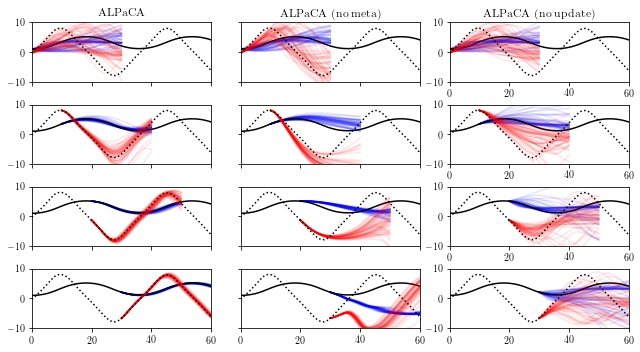

In [28]:
ind = 0
sample_size_list = [0,10,20,30]
T=60
N_samples=50
T_rollout = 30

plt.figure(figsize=(9,5))
for i,Nu in enumerate(sample_size_list):
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True
        
    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_pendulum_rollout_fig(agent, X_test[ind:ind+1,:,:], Y_test[ind:ind+1,:,:], Nu, N_samples=N_samples,T=T, T_rollout=T_rollout)
    if i == 0:
        plt.title('ALPaCA')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_pendulum_rollout_fig(agent_nometa, X_test[ind:ind+1,:,:], Y_test[ind:ind+1,:,:], Nu, N_samples=N_samples,T=T, T_rollout=T_rollout)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA (no meta)')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_pendulum_rollout_fig(agent, X_test[ind:ind+1,:,:], Y_test[ind:ind+1,:,:], Nu, N_samples=N_samples,T=T, T_rollout=T_rollout,update=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA (no update)')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/pendulum_three.pdf')
plt.show()

In [44]:
# compute NLL for all three models
import time
import tqdm

def gaussian_nll(y,mu,Sig):
    _,T,n = y.shape
    total_logdet = 0
    total_quadform = 0
    
    for t in range(T):
        total_logdet += np.log(np.linalg.det(Sig[0,t,:,:])) #np.log(np.linalg.det(Sig))
        total_quadform += ((y[0:1,t,:]-mu[0:1,t,:]) @ (np.linalg.inv(Sig[0,t,:,:])) @ (y[0:1,t,:]-mu[0:1,t,:]).T)
    nll = n*np.log(2*np.pi) + (total_logdet + total_quadform)/T
    
    return 0.5*nll[0,0]

def MSE(y,mu):
    return np.mean( np.sum( (y-mu)**2, axis=-1) )


def get_stats(meas, N):
    mean = sum(meas)/N
    var = sum([(nl - mean)**2 for nl in meas])/(N-1)
    return mean, var

alpaca_nll_mean = []
alpaca_nll_var = []
alpaca_time_mean = []
alpaca_time_var = []
alpaca_mse_mean = []
alpaca_mse_var = []

maml_time_mean = []
maml_time_var = []
maml_mse_mean = []
maml_mse_var = []
maml5_mse_mean = []
maml5_mse_var = []

lpaca_nll_mean = []
lpaca_nll_var = []
lpaca_time_mean = []
lpaca_time_var = []

prior_nll_mean = []
prior_nll_var = []

gp_nll_mean = []
gp_nll_var = []
gp_time_mean = []
gp_time_var = []


N_test = 500

test_horz1 = T
for j in tqdm.tqdm( range(test_horz1) ):
    nll_list_alpaca = []
    nll_list_lpaca = []
    nll_list_prior = []
    nll_list_gp = []
    
    mse_list_alpaca = []
    mse_list_maml = []
    mse_list_maml5 = []

    time_list_alpaca = []
    time_list_maml = []
    time_list_lpaca = []
    time_list_gp = []
    
    for ind in range(N_test):
        X_update = X_test[ind:(ind+1),:j,:]
        Y_update = Y_test[ind:(ind+1),:j,:]
        
        x_pt = X_test[ind:(ind+1),:,:]
        y_pt = Y_test[ind:(ind+1),:,:]
    
        X_empty = X_test[ind:(ind+1),:0,:]
        Y_empty = Y_test[ind:(ind+1),:0,:]

        t1_alpaca = time.process_time()
        y, s = agent.test(X_update, Y_update, x_pt)
        t2_alpaca = time.process_time()
        
        t1_maml = time.process_time()
        y_maml, _ = maml_agent.test(X_update, Y_update, x_pt)
        t2_maml = time.process_time()
        y_maml5, _ = maml_agent.test(X_update, Y_update, x_pt, num_updates=5)
        
        t1_lpaca = time.process_time()
        y_lpaca,s_lpaca = agent_nometa.test(X_update, Y_update, x_pt)
        t2_lpaca = time.process_time()
        
        t1_gp = time.process_time()
        y_gp, s_gp = GPR_agent.test(X_update, Y_update, x_pt)
        t2_gp = time.process_time()  
        
        y_prior,s_prior = agent_nometa.test(X_empty, Y_empty, x_pt)

        time_list_alpaca.append(t2_alpaca - t1_alpaca)
        time_list_lpaca.append(t2_lpaca - t1_lpaca)
            
        nll_list_alpaca.append(gaussian_nll(y_pt,y,s))
        nll_list_lpaca.append(gaussian_nll(y_pt,y_lpaca,s_lpaca))
        nll_list_prior.append(gaussian_nll(y_pt,y_prior,s_prior))
        nll_list_gp.append(gaussian_nll(y_pt,y_gp,s_gp))
        
        time_list_alpaca.append(t2_alpaca - t1_alpaca)
        time_list_lpaca.append(t2_lpaca - t1_lpaca)
        time_list_maml.append(t2_maml - t1_maml)
        time_list_gp.append(t2_gp - t1_gp)
        
        mse_list_alpaca.append(MSE(y_pt,y))
        mse_list_maml.append(MSE(y_pt, y_maml))
        mse_list_maml5.append(MSE(y_pt, y_maml5))

    
    time_mean_alpaca, time_var_alpaca = get_stats(time_list_alpaca,N_test)
    time_mean_lpaca, time_var_lpaca = get_stats(time_list_lpaca,N_test)
    time_mean_maml, time_var_maml = get_stats(time_list_maml,N_test)
    time_mean_gp, time_var_gp = get_stats(time_list_gp,N_test)
    
    mse_mean_alpaca, mse_var_alpaca = get_stats(mse_list_alpaca,N_test)
    mse_mean_maml, mse_var_maml = get_stats(mse_list_maml,N_test)
    mse_mean_maml5, mse_var_maml5 = get_stats(mse_list_maml5,N_test)
    
    nll_mean_alpaca, nll_var_alpaca = get_stats(nll_list_alpaca,N_test)
    nll_mean_lpaca, nll_var_lpaca = get_stats(nll_list_lpaca,N_test)
    nll_mean_prior, nll_var_prior = get_stats(nll_list_prior,N_test)
    nll_mean_gp, nll_var_gp = get_stats(nll_list_gp,N_test)
    
    alpaca_nll_mean.append(nll_mean_alpaca)
    alpaca_nll_var.append(nll_var_alpaca)
    
    lpaca_nll_mean.append(nll_mean_lpaca)
    lpaca_nll_var.append(nll_var_lpaca)
    
    prior_nll_mean.append(nll_mean_prior)
    prior_nll_var.append(nll_var_prior)
    
    gp_nll_mean.append(nll_mean_gp)
    gp_nll_var.append(nll_var_gp)
    
    alpaca_mse_mean.append(mse_mean_alpaca)
    alpaca_mse_var.append(mse_var_alpaca)
    
    maml_mse_mean.append(mse_mean_maml)
    maml_mse_var.append(mse_var_maml)
    
    maml5_mse_mean.append(mse_mean_maml5)
    maml5_mse_var.append(mse_var_maml5)
    
    alpaca_time_mean.append(time_mean_alpaca)
    alpaca_time_var.append(time_var_alpaca)
    
    lpaca_time_mean.append(time_mean_lpaca)
    lpaca_time_var.append(time_var_lpaca)
    
    maml_time_mean.append(time_mean_maml)
    maml_time_var.append(time_var_maml)
    
    gp_time_mean.append(time_mean_gp)
    gp_time_var.append(time_var_gp)

  2%|▏         | 1/60 [00:11<10:58, 11.16s/it]/home/apoorva/.envs/adapt/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'grad': array([0., 0., 0.]), 'warnflag': 2}
  " state: %s" % convergence_dict)
100%|██████████| 60/60 [18:38<00:00, 18.65s/it]


In [ ]:
plt.figure(figsize=(3.5,3))
nll_plot(alpaca_nll_mean,alpaca_nll_var,lpaca_nll_mean,lpaca_nll_var,prior_nll_mean,prior_nll_var,N_test,legend=True,last_legend_label=r'ALPaCA (no update)')
plt.tight_layout()
plt.savefig('figures/nll_pendulum.pdf')
plt.show()

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


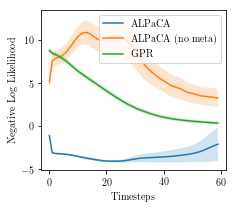

In [45]:
plt.figure(figsize=(3.5,3))
nll_plot(alpaca_nll_mean,alpaca_nll_var,lpaca_nll_mean,lpaca_nll_var,gp_nll_mean,gp_nll_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/nll_pendulum.pdf')
plt.show()

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


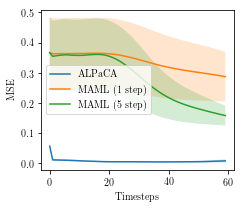

In [46]:
plt.figure(figsize=(3.5,3))
mse_plot(alpaca_mse_mean,alpaca_mse_var,maml_mse_mean,maml_mse_var,maml5_mse_mean,maml5_mse_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/mse_pendulum.pdf')
plt.show()

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


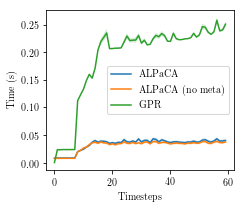

In [47]:
plt.figure(figsize=(3.5,3))
time_plot(alpaca_time_mean,alpaca_time_var,lpaca_time_mean,lpaca_time_var,gp_time_mean,gp_time_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/time_pendulum.pdf')
plt.show()